# HSMA 6 - Session 4G - Exercise 2A - Stroke Dataset Explainable AI - SOLUTION

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.  There are lots of features, and a description of the features can be found in the file stroke_data_feature_descriptions.csv.

Train a decision tree model to try to predict whether or not a stroke patient receives clot-busting treatment.  Use the prompts below to write each section of code.

Run the code below to import the dataset. 

In [37]:
import pandas as pd
import numpy as np

# Download data
# (not required if running locally and have previously downloaded data)

download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)

# Load data
data = pd.read_csv('data/hsma_stroke.csv')
# Make all data 'float' type
data = data.astype(float)

Import the libraries you may need! What was used last time? 

What additional libraries might you need to import to try out the different boosted trees?

In [38]:
# Import machine learning methods

from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import auc, roc_curve, RocCurveDisplay, f1_score, precision_score, \
                            recall_score, confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report


In [39]:
# Additional imports for explainable
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

# Import shap for shapley values
import shap

# JavaScript Important for the interactive charts later on
shap.initjs()

In [40]:
X = data.drop('Clotbuster given',axis=1) # X = all 'data' except the 'survived' column
y = data['Clotbuster given'] # y = 'survived' column from 'data'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
model = XGBClassifier(random_state=42)
model = model.fit(X_train,y_train)
# Predict training and test set labels
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train}')
print (f'Accuracy of predicting test data = {accuracy_test}')

Accuracy of predicting training data = 0.9978510028653295
Accuracy of predicting test data = 0.8154506437768241


# Feature Importance

### MDI

In [41]:
features = list(X_train)

feature_importances_xgb = model.feature_importances_
importances_xgb = pd.DataFrame(index=features)
importances_xgb['importance_xgb'] = feature_importances_xgb
importances_xgb['rank_xgb'] = importances_xgb['importance_xgb'].rank(ascending=False).values
importances_xgb.sort_values('rank_xgb').head()

importance_xgb  rank_xgb
Stroke Type_I                   0.292050       1.0
Onset Time Known Type_BE        0.060007       2.0
S2NihssArrival                  0.047182       3.0
Anticoag before stroke_1        0.042693       4.0
S2RankinBeforeStroke            0.038013       5.0

### PFI

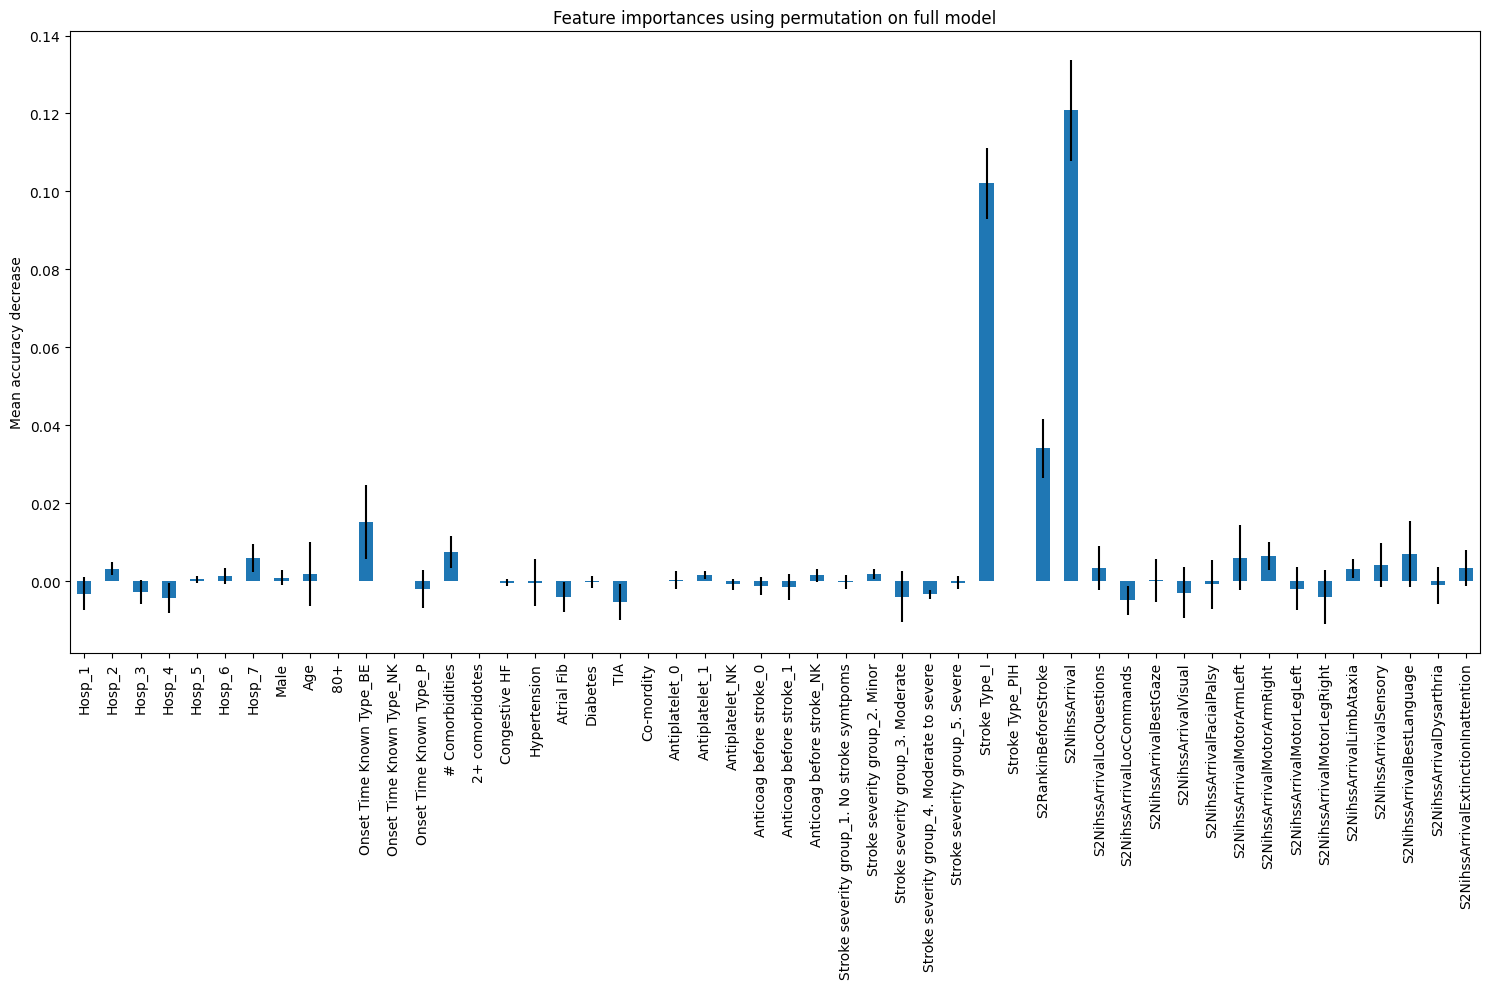

In [42]:
feature_names = X.columns.tolist()

result_dt_pfi = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

importances_pfi_dt = pd.Series(result_dt_pfi.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
importances_pfi_dt.plot.bar(yerr=result_dt_pfi.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# PDP + ICE

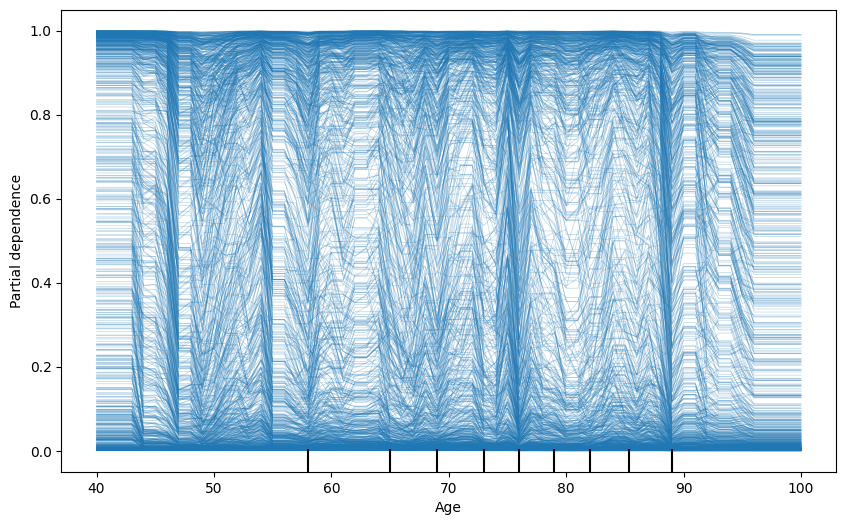

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(
    model,  # Your fitted model
    X_train,  # Your feature matrix
    features=['Age'],  # List of features to plot
    target=0,
    kind='individual',  # Type of PDP
    ax=ax,
    random_state=42
)
plt.show()

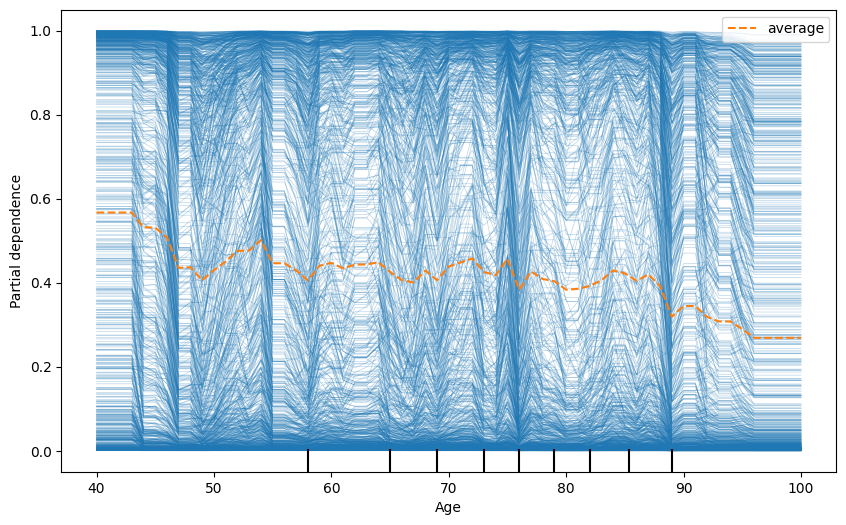

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(
    model,  # Your fitted model
    X_train,  # Your feature matrix
    features=['Age'],  # List of features to plot
    target=0,
    kind='both',  # Type of PDP
    ax=ax,
    random_state=42
)
plt.show()

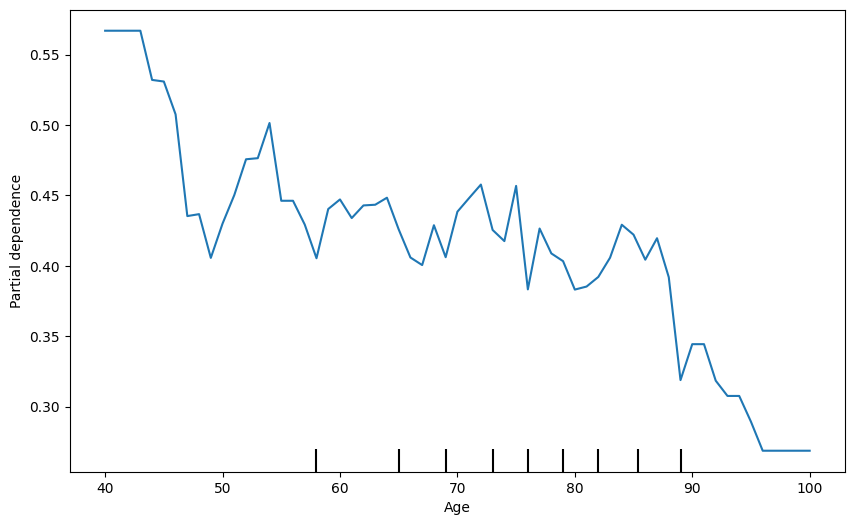

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(
    model,  # Your fitted model
    X_train,  # Your feature matrix
    features=['Age'],  # List of features to plot
    target=0,
    kind='average',  # Type of PDP
    ax=ax,
    random_state=42
)
plt.show()

# SHAP

In [46]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)

shap_values

.values =
array([[ 0.57191953, -0.00599206, -0.02803201, ...,  0.53735721,
        -0.11320076, -0.18555162],
       [ 0.01019792, -0.01376853, -0.20353487, ...,  0.0578289 ,
         0.08007584, -0.10086989],
       [-0.06371776, -0.05613441,  0.00877733, ..., -0.40052104,
        -0.15933883, -0.24292226],
       ...,
       [-0.00602321,  0.17367847,  0.0584153 , ..., -0.00764367,
         0.18520108, -0.16023535],
       [-0.02695623, -0.01631852,  0.035347  , ...,  0.75401062,
         0.12778105, -0.06493782],
       [-0.08913676, -0.06648799,  0.06200275, ..., -0.47741059,
        -0.15630577, -0.15140597]])

.base_values =
array([-1.97564877, -1.97564877, -1.97564877, -1.97564877, -1.97564877,
       -1.97564877, -1.97564877, -1.97564877, -1.97564877, -1.97564877,
       -1.97564877, -1.97564877, -1.97564877, -1.97564877, -1.97564877,
       -1.97564877, -1.97564877, -1.97564877, -1.97564877, -1.97564877,
       -1.97564877, -1.97564877, -1.97564877, -1.97564877, -1.97564877,
 

In [47]:
shap_values_numeric = shap_values.values
shap_values_numeric

array([[ 0.57191953, -0.00599206, -0.02803201, ...,  0.53735721,
        -0.11320076, -0.18555162],
       [ 0.01019792, -0.01376853, -0.20353487, ...,  0.0578289 ,
         0.08007584, -0.10086989],
       [-0.06371776, -0.05613441,  0.00877733, ..., -0.40052104,
        -0.15933883, -0.24292226],
       ...,
       [-0.00602321,  0.17367847,  0.0584153 , ..., -0.00764367,
         0.18520108, -0.16023535],
       [-0.02695623, -0.01631852,  0.035347  , ...,  0.75401062,
         0.12778105, -0.06493782],
       [-0.08913676, -0.06648799,  0.06200275, ..., -0.47741059,
        -0.15630577, -0.15140597]])

### Feature table

In [48]:
# get feature importance for comparison using MDI method
features = list(X_train)
feature_importances = model.feature_importances_
importances = pd.DataFrame(index=features)
importances['importance'] = feature_importances
importances['rank'] = importances['importance'].rank(ascending=False).values
importances.sort_values('rank').head()

# Get shapley importances
# Calculate mean Shapley value for each feature in trainign set
importances['mean_shapley_values'] = np.mean(
    shap_values_numeric, axis=0
    )

# Calculate mean absolute Shapley value for each feature in trainign set
# This will give us the average importance of each feature
importances['mean_abs_shapley_values'] = np.mean(
    np.abs(shap_values_numeric), axis=0
    )

importances


importance  rank  \
Hosp_1                                         0.016272  14.0   
Hosp_2                                         0.009090  41.0   
Hosp_3                                         0.011619  30.0   
Hosp_4                                         0.025572   6.0   
Hosp_5                                         0.016513  13.0   
Hosp_6                                         0.018912   8.0   
Hosp_7                                         0.009989  37.0   
Male                                           0.011162  32.0   
Age                                            0.012259  28.0   
80+                                            0.000000  48.0   
Onset Time Known Type_BE                       0.060007   2.0   
Onset Time Known Type_NK                       0.000000  48.0   
Onset Time Known Type_P                        0.021683   7.0   
# Comorbidities                                0.012480  27.0   
2+ comorbidotes                                0.000000  48.0   
Congestive HF                                  0.008597  42.0   
Hypertension                                   0.012239  29.0   
Atrial Fib                                     0.016634  12.0   
Diabetes                                       0.017148  11.0   
TIA                                            0.016100  15.0   
Co-mordity                                     0.000000  48.0   
Antiplatelet_0                                 0.009424  39.0   
Antiplatelet_1                                 0.006572  43.0   
Antiplatelet_NK                                0.013325  23.0   
Anticoag before stroke_0                       0.014763  17.0   
Anticoag before stroke_1                       0.042693   4.0   
Anticoag before stroke_NK                      0.014519  18.0   
Stroke severity group_1. No stroke symtpoms    0.004698  44.0   
Stroke severity group_2. Minor                 0.002441  45.0   
Stroke severity group_3. Moderate              0.009636  38.0   
Stroke severity group_4. Moderate to severe    0.010140  36.0   
Stroke severity group_5. Severe                0.011573  31.0   
Stroke Type_I                                  0.292050   1.0   
Stroke Type_PIH                                0.000000  48.0   
S2RankinBeforeStroke                           0.038013   5.0   
S2NihssArrival                                 0.047182   3.0   
S2NihssArrivalLocQuestions                     0.013432  22.0   
S2NihssArrivalLocCommands                      0.013001  25.0   
S2NihssArrivalBestGaze                         0.017906  10.0   
S2NihssArrivalVisual                           0.010915  34.0   
S2NihssArrivalFacialPalsy                      0.013921  19.0   
S2NihssArrivalMotorArmLeft                     0.018599   9.0   
S2NihssArrivalMotorArmRight                    0.009192  40.0   
S2NihssArrivalMotorLegLeft                     0.011116  33.0   
S2NihssArrivalMotorLegRight                    0.013778  21.0   
S2NihssArrivalLimbAtaxia                       0.010385  35.0   
S2NihssArrivalSensory                          0.012529  26.0   
S2NihssArrivalBestLanguage                     0.013232  24.0   
S2NihssArrivalDysarthria                       0.014873  16.0   
S2NihssArrivalExtinctionInattention            0.013818  20.0   

                                             mean_shapley_values  \
Hosp_1                                                  0.048697   
Hosp_2                                                  0.007687   
Hosp_3                                                  0.009452   
Hosp_4                                                 -0.006476   
Hosp_5                                                  0.000117   
Hosp_6                                                 -0.017381   
Hosp_7                                                  0.020218   
Male                                                    0.011670   
Age                                                     0.095522   
80+                                              

#### Feature importance comparison

In [49]:
importance_top_10 = \
    importances.sort_values(
        by='importance', ascending=False
        ).head(10).index

shapley_top_10 = \
    importances.sort_values(
        by='mean_abs_shapley_values',
        ascending=False).head(10).index

# Add to DataFrame
top_10_features = pd.DataFrame()
top_10_features['importances'] = importance_top_10.values
top_10_features['Shapley'] = shapley_top_10.values

# Display
top_10_features

importances                     Shapley
0               Stroke Type_I               Stroke Type_I
1    Onset Time Known Type_BE              S2NihssArrival
2              S2NihssArrival                         Age
3    Anticoag before stroke_1    Onset Time Known Type_BE
4        S2RankinBeforeStroke        S2RankinBeforeStroke
5                      Hosp_4  S2NihssArrivalBestLanguage
6     Onset Time Known Type_P                         TIA
7                      Hosp_6      S2NihssArrivalBestGaze
8  S2NihssArrivalMotorArmLeft  S2NihssArrivalLocQuestions
9      S2NihssArrivalBestGaze                Hypertension

### Global: Beeswarm

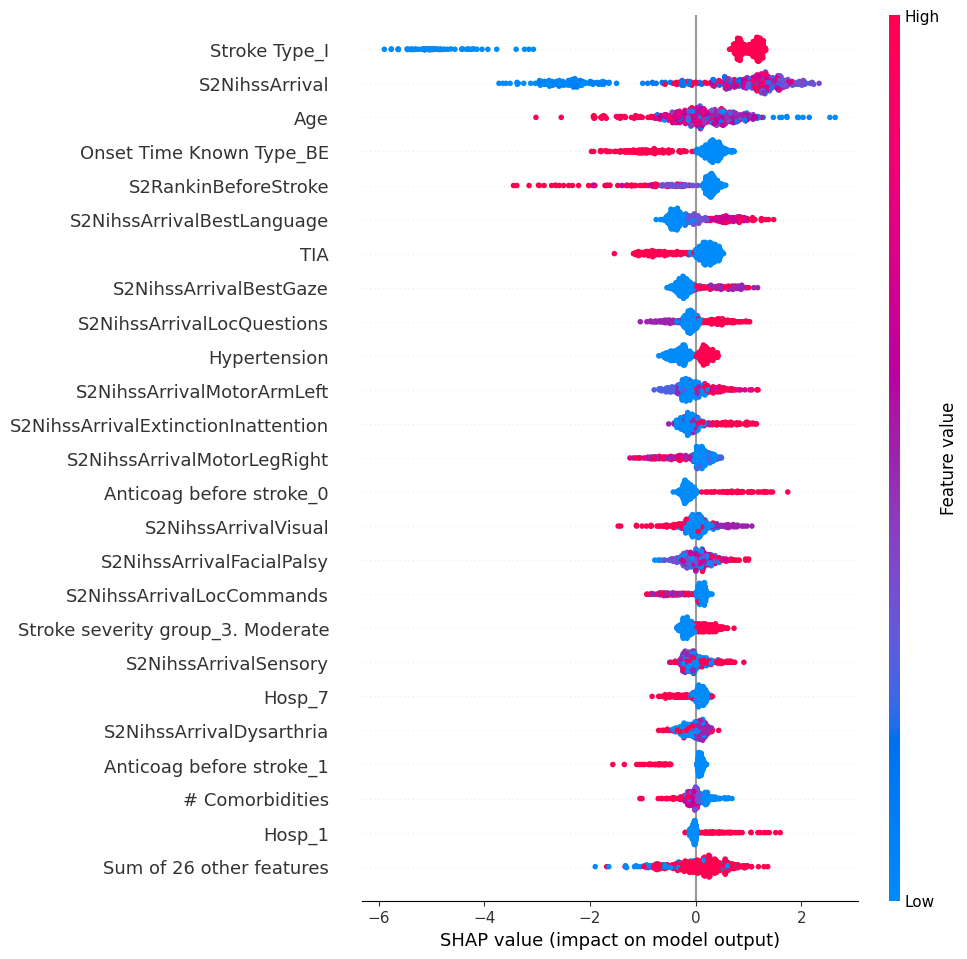

In [50]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=25)

### Global: Bar

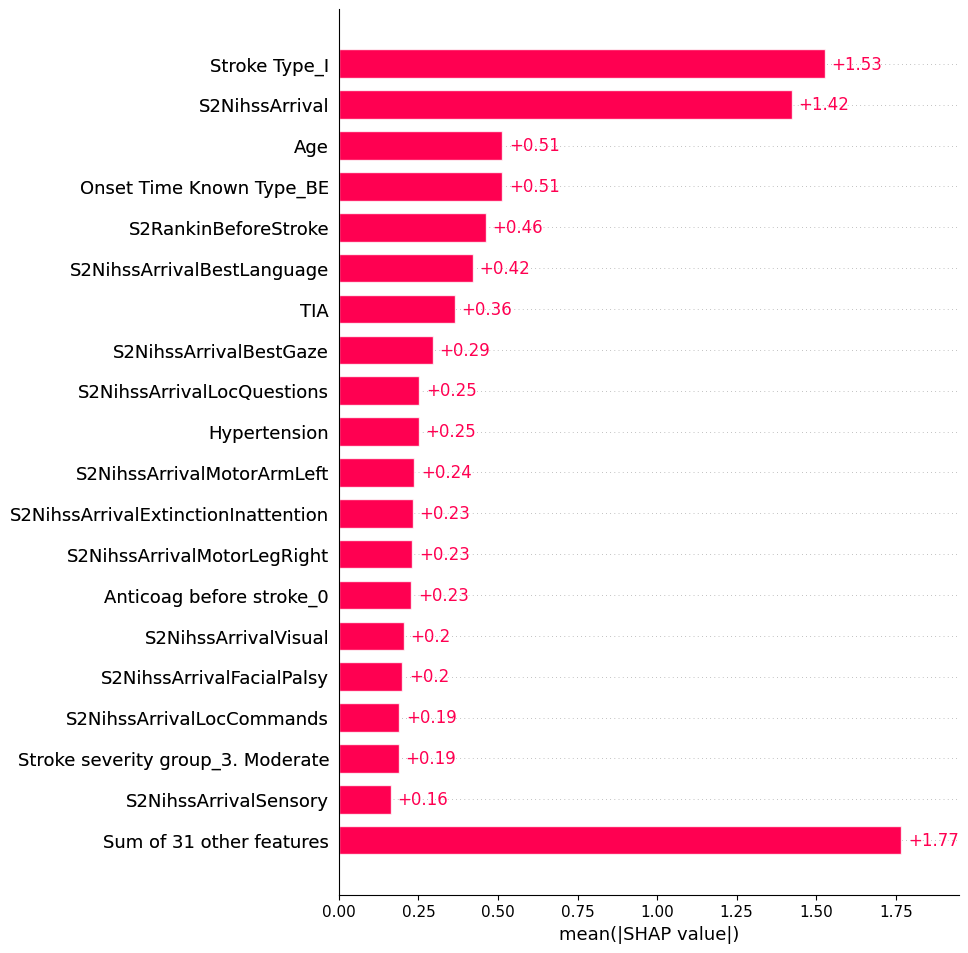

In [51]:
shap.plots.bar(shap_values, max_display=20)

### Bar: by factor

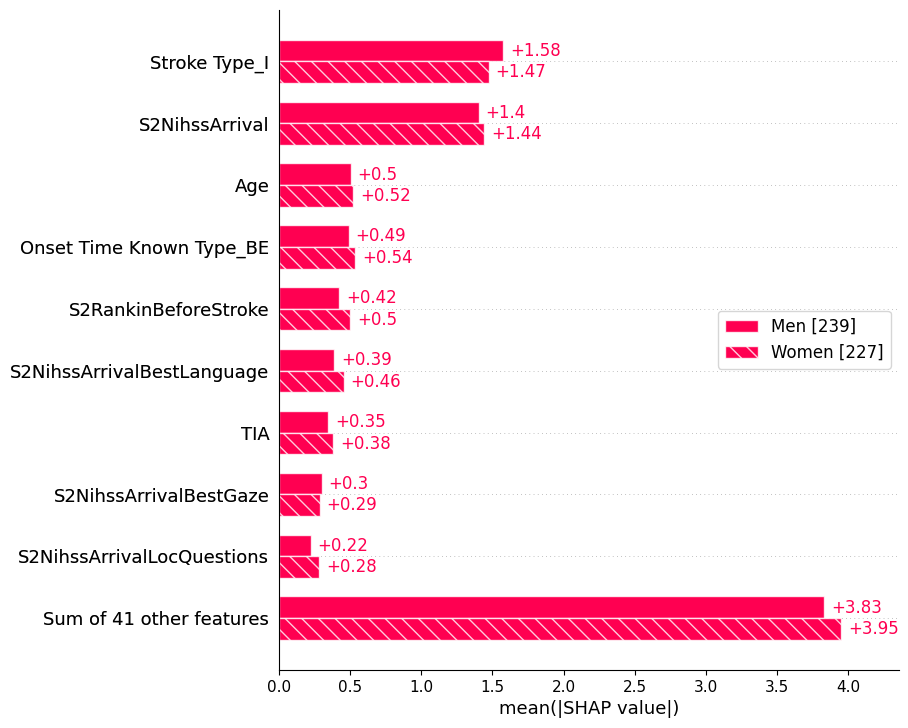

In [52]:
sex = ["Women" if shap_values[i, "Male"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

## Local: Waterfall plots

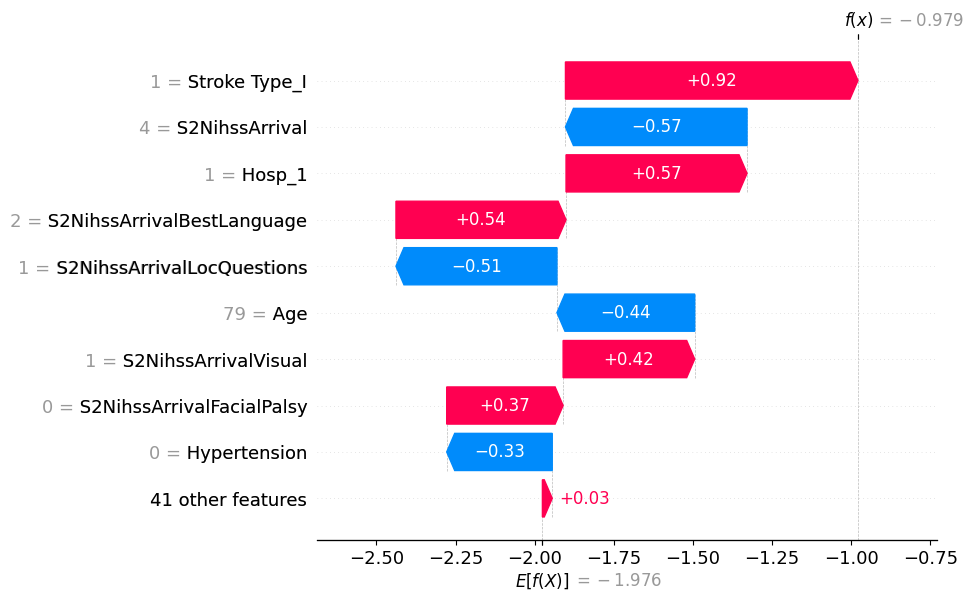

In [53]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

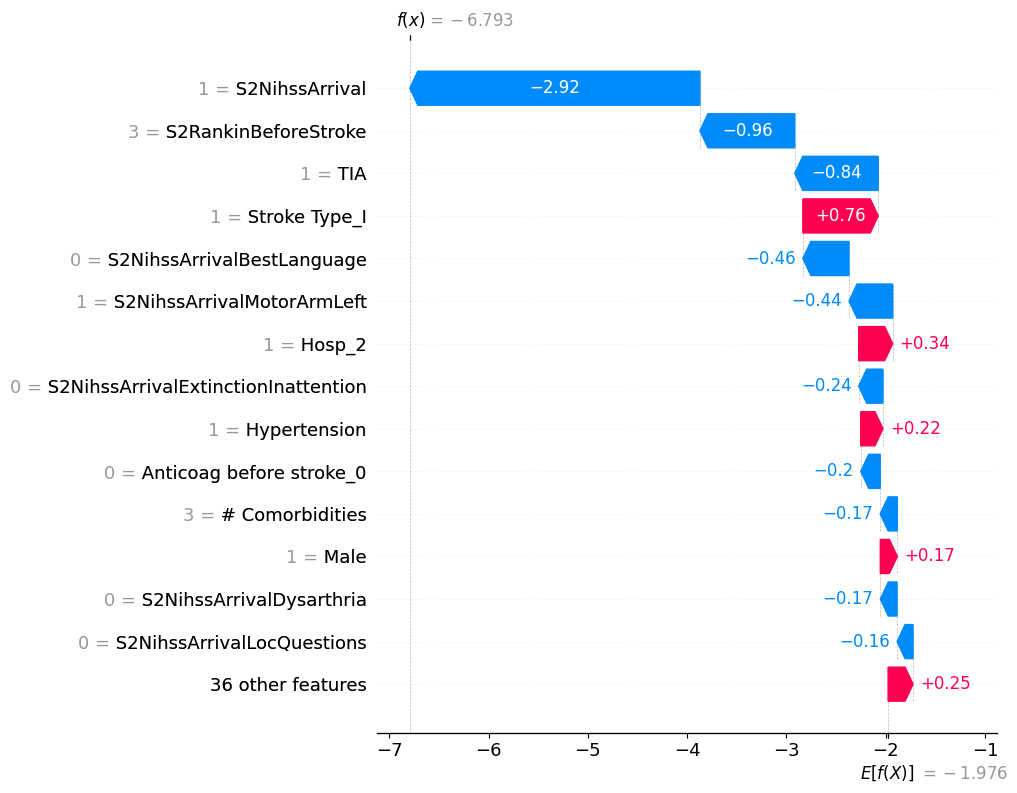

In [54]:
# visualize another prediction's explanation
shap.plots.waterfall(shap_values[7], max_display=15)

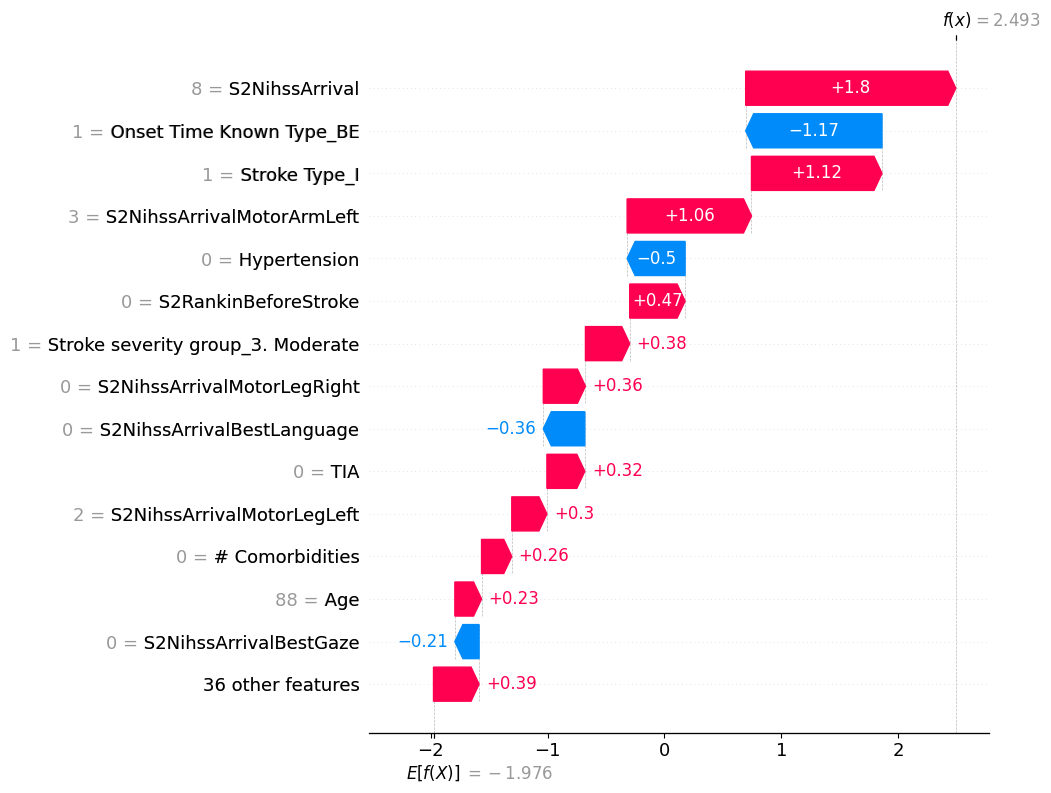

In [55]:
# visualize another prediction's explanation
shap.plots.waterfall(shap_values[145], max_display=15)

### Local: Force Plots 

In [56]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

### Global: Force Plots

In [57]:
# visualize all the predictions
# this struggles with a large number of values so we'll sample a small set
shap.plots.force(shap.utils.sample(shap_values, 1000))

### Dependence Plots

In [58]:
X.columns

Index(['Hosp_1', 'Hosp_2', 'Hosp_3', 'Hosp_4', 'Hosp_5', 'Hosp_6', 'Hosp_7',
       'Male', 'Age', '80+', 'Onset Time Known Type_BE',
       'Onset Time Known Type_NK', 'Onset Time Known Type_P',
       '# Comorbidities', '2+ comorbidotes', 'Congestive HF', 'Hypertension',
       'Atrial Fib', 'Diabetes', 'TIA', 'Co-mordity', 'Antiplatelet_0',
       'Antiplatelet_1', 'Antiplatelet_NK', 'Anticoag before stroke_0',
       'Anticoag before stroke_1', 'Anticoag before stroke_NK',
       'Stroke severity group_1. No stroke symtpoms',
       'Stroke severity group_2. Minor', 'Stroke severity group_3. Moderate',
       'Stroke severity group_4. Moderate to severe',
       'Stroke severity group_5. Severe', 'Stroke Type_I', 'Stroke Type_PIH',
       'S2RankinBeforeStroke', 'S2NihssArrival', 'S2NihssArrivalLocQuestions',
       'S2NihssArrivalLocCommands', 'S2NihssArrivalBestGaze',
       'S2NihssArrivalVisual', 'S2NihssArrivalFacialPalsy',
       'S2NihssArrivalMotorArmLeft', 'S2NihssArrivalM

#### Simple scatter of a single feature

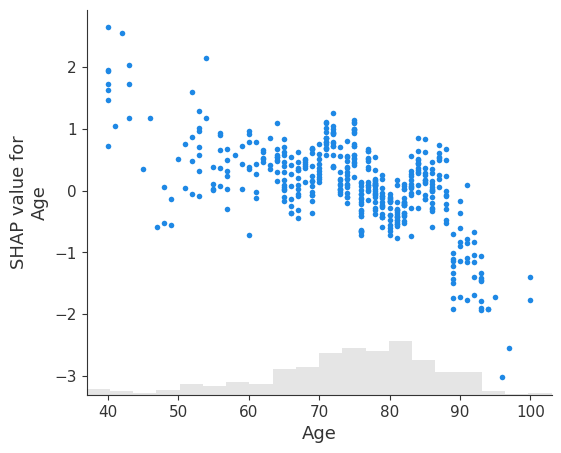

In [59]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, 'Age'])

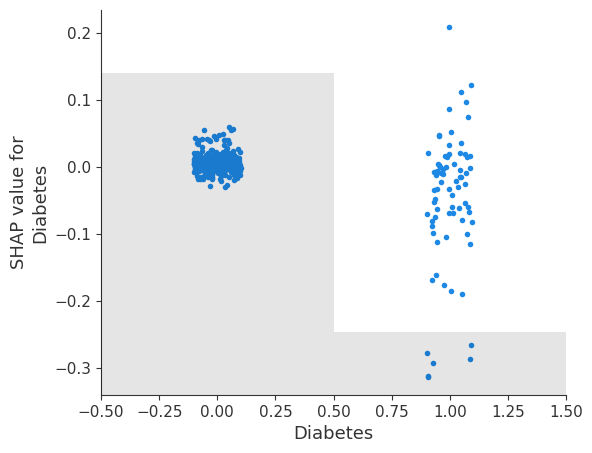

In [60]:
shap.plots.scatter(shap_values[:, 'Diabetes'])

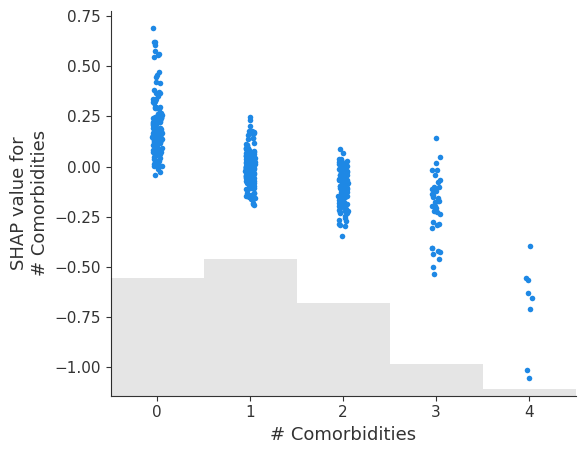

In [61]:
shap.plots.scatter(shap_values[:, '# Comorbidities'])

### Scatter of multiple features 

Passing in shap_values to the colour will colour the value by the most strongly interacting other value.

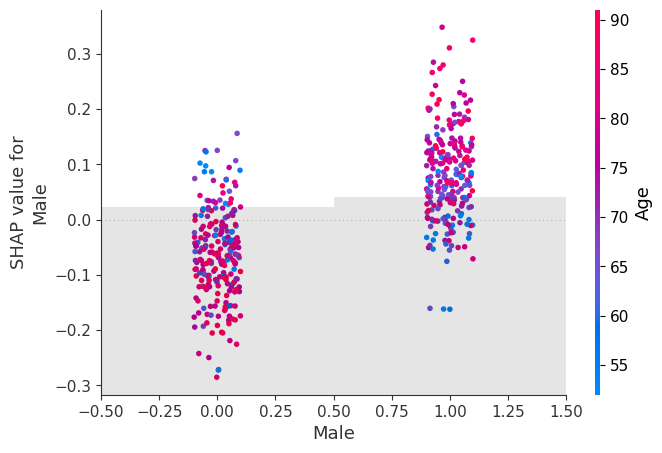

In [62]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Male"], color=shap_values)

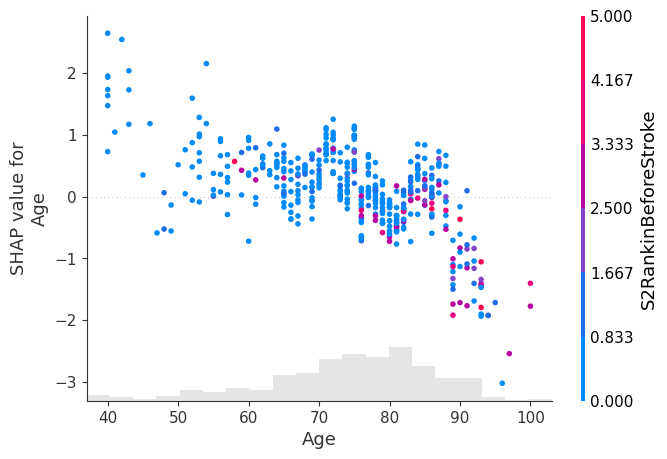

In [63]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

Alternatively we can choose to colour by a specific column.

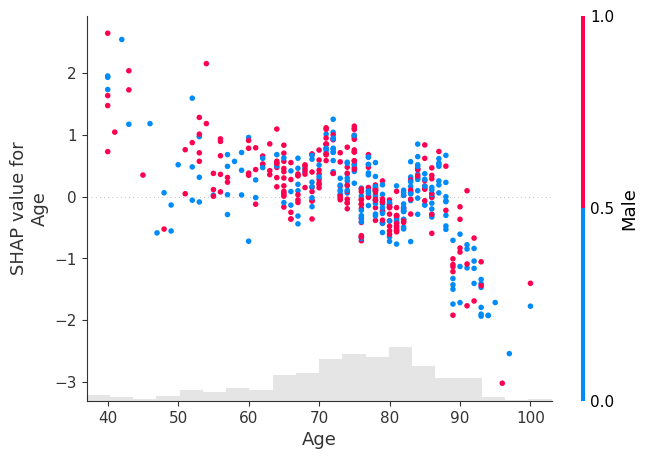

In [64]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:,"Male"])

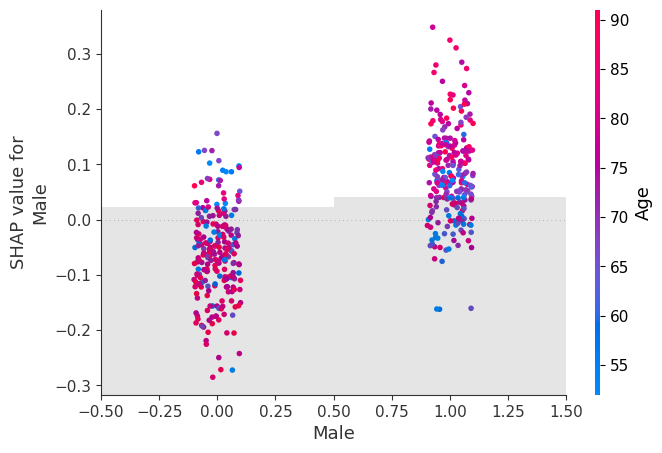

In [65]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Male"], color=shap_values[:,"Age"])

## Prediction Uncertainty

In [66]:
splits = 50
train_set = []

for i in range(splits):
    train_set.append(X_train.join(y_train).sample(frac=1, replace=True))


In [67]:
# Set up lists for models and probability predictions
models = []
results  = []
accuracies = []

for i in range(splits):

    # Get X and y
    X_train = train_set[i].drop('Clotbuster given', axis=1)
    y_train = train_set[i]['Clotbuster given']

    # Define and train model; use different random seed for each model
    model = XGBClassifier(random_state=42+i)
    model.fit(X_train, y_train)
    models.append(model)

    # Get predicted probabilities and class
    y_probs = model.predict_proba(X_test)[:,1]
    y_pred = y_probs > 0.5
    results.append([y_probs])

    # Show accuracy
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

results = np.array(results)
results = results.T.reshape(-1, splits)

In [68]:
print (f'Mean accuracy: {np.mean(accuracies):0.3f}')

Mean accuracy: 0.803


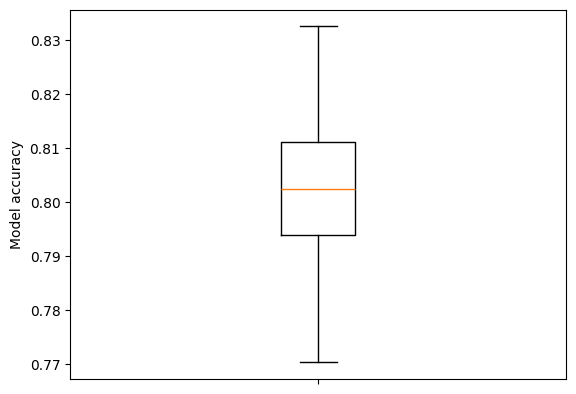

In [69]:
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(accuracies, whis=999)
ax.set_ylabel('Model accuracy')
ax.axes.xaxis.set_ticklabels([]) # Remove xtick labels
plt.show()

In [70]:
classification = results >= 0.5
consensus = classification.sum(axis=1) >= splits/2
consensus_accuracy = np.mean(consensus == y_test)
print (f'Consensus accuracy: {consensus_accuracy:0.3f}')

Consensus accuracy: 0.826


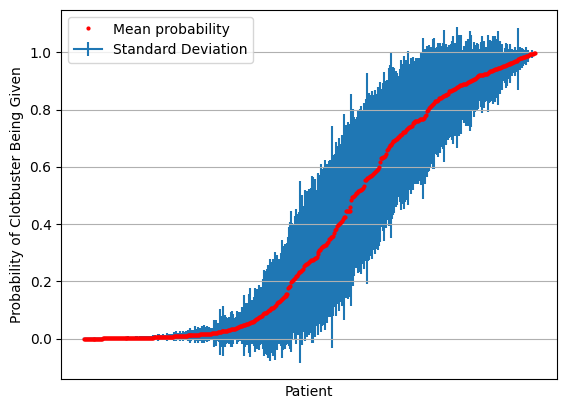

In [71]:
results = results[np.mean(results,axis=1).argsort()]
mean = np.mean(results,axis=1)
stdev = np.std(results,axis=1)

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(range(len(mean)), mean, yerr=stdev, label='Standard Deviation', zorder=1)
ax.plot(mean, 'o', c='r', markersize=2, label = 'Mean probability', zorder=2)
ax.axes.xaxis.set_ticklabels([])
ax.set_xlabel('Patient')
ax.set_ylabel('Probability of Clotbuster Being Given')
ax.set_xticks([])
ax.grid()
ax.legend()
plt.show()


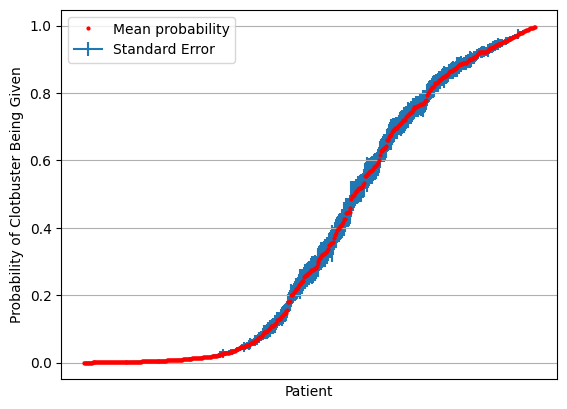

In [72]:
results = results[np.mean(results,axis=1).argsort()]

mean = np.mean(results,axis=1)
stdev = np.std(results,axis=1)
se = stdev / np.sqrt(splits)

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(range(len(mean)), mean, yerr=se, label='Standard Error', zorder=1)
ax.plot(mean, 'o', c='r', markersize=2, label = 'Mean probability', zorder=2)
ax.axes.xaxis.set_ticklabels([])
ax.set_xlabel('Patient')
ax.set_ylabel('Probability of Clotbuster Being Given')
ax.set_xticks([])
ax.grid()
ax.legend()
plt.show()